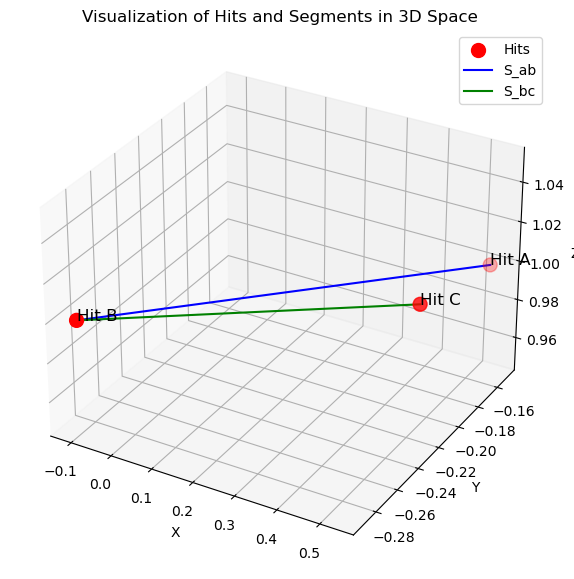

Angle (radians): 3.080121090507649
Angle (degrees): 176.47793887532094
Adjacency Matrix S:
[[0 1 0]
 [0 0 1]
 [0 0 0]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define three arbitrary hit positions in 3D space
hits_positions = np.array([
    [0.5310167307309791, -0.15186764768774583, 1.0],
    [-0.10518326652577707, -0.29040827163224037, 1.0],
    [0.47906932244933287, -0.2003471791764583, 1.0]
])

# Create the S matrix
S = np.array([
    [0, 1, 0],  # Hit A connected to Hit B
    [0, 0, 1],  # Hit B connected to Hit C
    [0, 0, 0]   # Hit C (no outgoing connections)
])

# Compute the vectors between hits
S_ab = hits_positions[1] - hits_positions[0]  
S_bc = hits_positions[2] - hits_positions[1]  

#magnitude of the segments
norm_ab = np.linalg.norm(S_ab)
norm_bc = np.linalg.norm(S_bc)

#angle between the segments using the dot product
cos_theta_abc = np.dot(S_ab, S_bc) / (norm_ab * norm_bc)
theta_abc = np.arccos(cos_theta_abc)

# Visualize the hits and the segments in 3D space
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the hits
ax.scatter(hits_positions[:, 0], hits_positions[:, 1], hits_positions[:, 2], color='red', s=100, label="Hits")

# Plot the segments according to the S matrix
if S[0, 1] == 1:
    ax.plot([hits_positions[0, 0], hits_positions[1, 0]], [hits_positions[0, 1], hits_positions[1, 1]], 
            [hits_positions[0, 2], hits_positions[1, 2]], color='blue', label="S_ab")
if S[1, 2] == 1:
    ax.plot([hits_positions[1, 0], hits_positions[2, 0]], [hits_positions[1, 1], hits_positions[2, 1]], 
            [hits_positions[1, 2], hits_positions[2, 2]], color='green', label="S_bc")

# Annotations
ax.text(hits_positions[0, 0], hits_positions[0, 1], hits_positions[0, 2], 'Hit A', fontsize=12)
ax.text(hits_positions[1, 0], hits_positions[1, 1], hits_positions[1, 2], 'Hit B', fontsize=12)
ax.text(hits_positions[2, 0], hits_positions[2, 1], hits_positions[2, 2], 'Hit C', fontsize=12)

# Formatting plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualization of Hits and Segments in 3D Space')
ax.legend()

# Display the plot
plt.show()

# Output the calculated angle in radians and degrees
print(f"Angle (radians): {theta_abc}")
print(f"Angle (degrees): {np.degrees(theta_abc)}")

# Display the S matrix
print("Adjacency Matrix S:")
print(S)


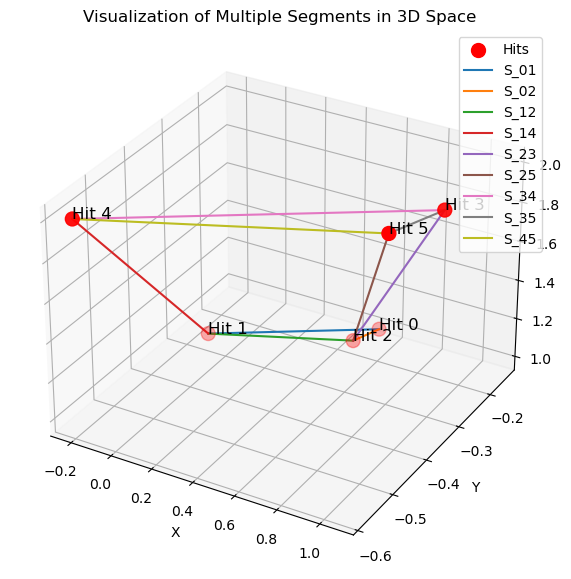

Adjacency Matrix S:
[[0 1 1 0 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 0 1]
 [0 0 0 0 1 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define three arbitrary hit positions in 3D space
hits_positions = np.array([
    [0.5310167307309791, -0.15186764768774583, 1.0],  # Hit 0
    [-0.10518326652577707, -0.29040827163224037, 1.0],  # Hit 1
    [0.47906932244933287, -0.2003471791764583, 1.0],  # Hit 2
    [1.0620334614619582, -0.30373529537549165, 2.0],  # Hit 3
    [-0.21036653305155414, -0.5808165432644807, 2.0],  # Hit 4
    [0.9581386448986657, -0.4006943583529166, 2.0],  # Hit 5
])

# Create the S matrix (6x6 for 6 hits)
# 1 indicates an oriented segment exists from hit a to hit b
S = np.array([
    [0, 1, 1, 0, 0, 0],  # Hit 0 connected to Hit 1 and Hit 2
    [0, 0, 1, 0, 1, 0],  # Hit 1 connected to Hit 2 and Hit 4
    [0, 0, 0, 1, 0, 1],  # Hit 2 connected to Hit 3 and Hit 5
    [0, 0, 0, 0, 1, 1],  # Hit 3 connected to Hit 4 and Hit 5
    [0, 0, 0, 0, 0, 1],  # Hit 4 connected to Hit 5
    [0, 0, 0, 0, 0, 0]   # Hit 5 has no outgoing connections
])

# Visualize the hits and the segments in 3D space
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the hits
ax.scatter(hits_positions[:, 0], hits_positions[:, 1], hits_positions[:, 2], color='red', s=100, label="Hits")

# Plot the segments based on the S matrix
for a in range(S.shape[0]):
    for b in range(S.shape[1]):
        if S[a, b] == 1:  # If there's a segment from hit a to hit b
            ax.plot([hits_positions[a, 0], hits_positions[b, 0]], 
                    [hits_positions[a, 1], hits_positions[b, 1]], 
                    [hits_positions[a, 2], hits_positions[b, 2]], label=f"S_{a}{b}")

# Annotations for hits
for i in range(len(hits_positions)):
    ax.text(hits_positions[i, 0], hits_positions[i, 1], hits_positions[i, 2], f'Hit {i}', fontsize=12)

# Formatting plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Visualization of Multiple Segments in 3D Space')
ax.legend()

# Display the plot
plt.show()

# Display the adjacency matrix S
print("Adjacency Matrix S:")
print(S)


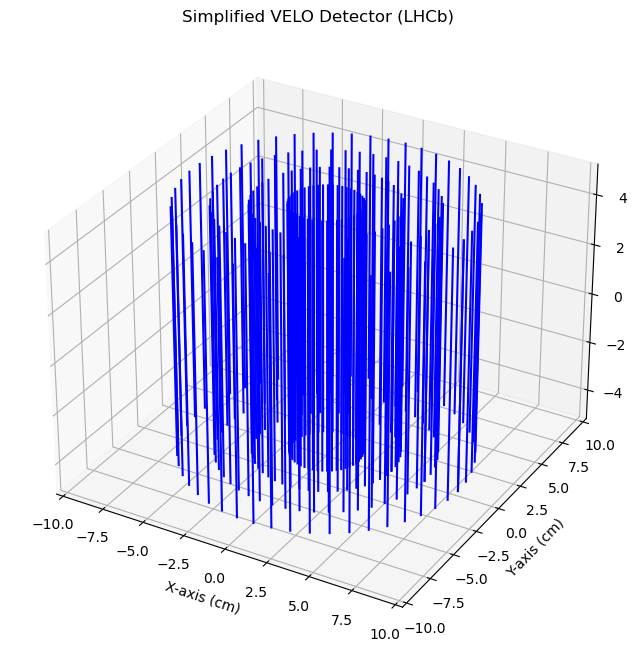

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot a simplified version of the LHCb VELO detector
def plot_velo_detector():
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Parameters for the detector layout
    n_layers = 4  # Number of cylindrical layers (simplified)
    layer_radius = [2, 4, 6, 8]  # Radius of each layer
    height = 10  # Total height of the detector

    # Plot each layer as a set of points (simplified radial arrangement)
    for layer in range(n_layers):
        z = np.linspace(-height / 2, height / 2, 100)  # Along the z-axis (beamline)
        theta = np.linspace(0, 2 * np.pi, 50)  # Angular positions of sensors

        # Create circular patterns of sensors in each layer
        for angle in theta:
            x = layer_radius[layer] * np.cos(angle)
            y = layer_radius[layer] * np.sin(angle)
            ax.plot(x * np.ones_like(z), y * np.ones_like(z), z, color='b')

    # Labels and axis limits
    ax.set_xlabel('X-axis (cm)')
    ax.set_ylabel('Y-axis (cm)')
    ax.set_zlabel('Z-axis (beamline)')
    ax.set_title("Simplified VELO Detector (LHCb)")
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-height / 2, height / 2])

    plt.show()

# Call the function to plot the VELO detector
plot_velo_detector()



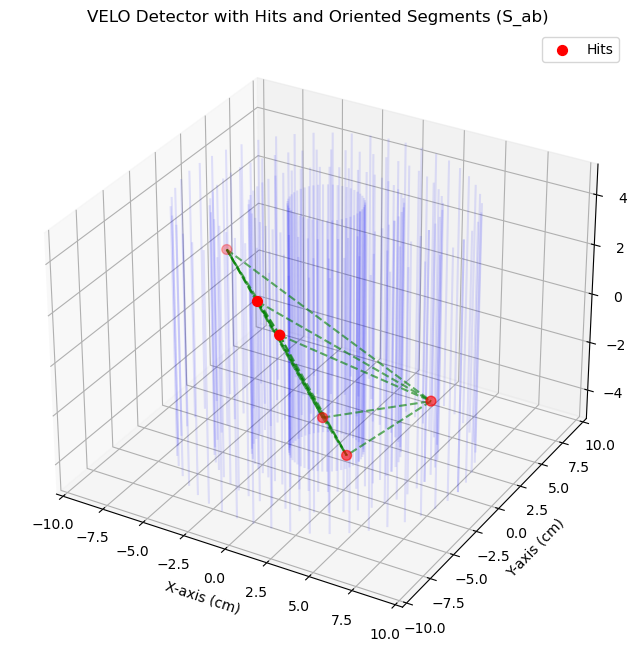

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate random hits on the detector layers
def generate_hits(n_hits, layer_radius, height):
    hits = []
    for i in range(n_hits):
        layer = np.random.choice(len(layer_radius))  # Randomly choose a layer
        angle = np.random.uniform(0, 2 * np.pi)  # Random angle around the beamline
        z = np.random.uniform(-height / 2, height / 2)  # Random z-position
        x = layer_radius[layer] * np.cos(angle)
        y = layer_radius[layer] * np.sin(angle)
        hits.append([x, y, z])
    return np.array(hits)

# Function to plot the VELO detector layers, hits, and segments S_ab
def plot_velo_with_hits_and_segments(n_hits):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Parameters for the detector layout
    n_layers = 4  # Number of cylindrical layers (simplified)
    layer_radius = [2, 4, 6, 8]  # Radius of each layer
    height = 10  # Total height of the detector

    # Generate random hits
    hits = generate_hits(n_hits, layer_radius, height)

    # Plot each layer as a set of points (simplified radial arrangement)
    for layer in range(n_layers):
        z = np.linspace(-height / 2, height / 2, 100)  # Along the z-axis (beamline)
        theta = np.linspace(0, 2 * np.pi, 50)  # Angular positions of sensors
        for angle in theta:
            x = layer_radius[layer] * np.cos(angle)
            y = layer_radius[layer] * np.sin(angle)
            ax.plot(x * np.ones_like(z), y * np.ones_like(z), z, color='b', alpha=0.1)

    # Plot the hits as red points
    ax.scatter(hits[:, 0], hits[:, 1], hits[:, 2], color='r', s=50, label='Hits')

    # Plot oriented segments S_ab (connecting hit pairs)
    for i in range(len(hits) - 1):
        for j in range(i + 1, len(hits)):
            # Create an oriented segment between hits i and j
            x_vals = [hits[i, 0], hits[j, 0]]
            y_vals = [hits[i, 1], hits[j, 1]]
            z_vals = [hits[i, 2], hits[j, 2]]
            ax.plot(x_vals, y_vals, z_vals, color='g', linestyle='--', alpha=0.6)
    
    # Labels and axis limits
    ax.set_xlabel('X-axis (cm)')
    ax.set_ylabel('Y-axis (cm)')
    ax.set_zlabel('Z-axis (beamline)')
    ax.set_title("VELO Detector with Hits and Oriented Segments (S_ab)")
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-height / 2, height / 2])
    
    plt.legend()
    plt.show()

# Call the function to plot the VELO detector with hits and segments
plot_velo_with_hits_and_segments(n_hits=6)


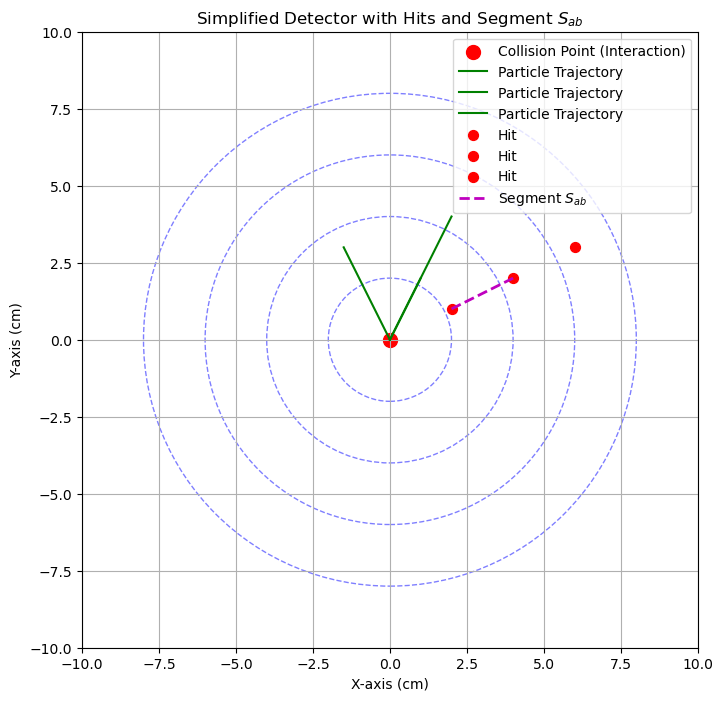

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_detector_and_segments():
    fig, ax = plt.subplots(figsize=(8, 8))

    # Parameters for the detector layout
    n_layers = 4  
    layer_radii = [2, 4, 6, 8]  # Radii of the layers
    collision_point = [0, 0]  

    # Plot the layers as concentric circles
    for radius in layer_radii:
        circle = plt.Circle(collision_point, radius, color='b', fill=False, linestyle='--', alpha=0.5)
        ax.add_artist(circle)

    # Plot the collision point
    ax.scatter(*collision_point, color='r', s=100, label='Collision Point (Interaction)')

    # Define some example particle trajectories (for simplicity, straight lines from the collision point)
    trajectories = [
        [[0, 0], [1, 2]],    # Particle 1
        [[0, 0], [-1.5, 3]], # Particle 2
        [[0, 0], [2, 4]],    # Particle 3
    ]

    # Plot particle trajectories
    for traj in trajectories:
        ax.plot([traj[0][0], traj[1][0]], [traj[0][1], traj[1][1]], color='g', label='Particle Trajectory')

    # Example hits on the detector layers 
    hits = [
        [2, 1],  # Hit on layer 1
        [4, 2],  # Hit on layer 2
        [6, 3],  # Hit on layer 3
    ]

    for hit in hits:
        ax.scatter(hit[0], hit[1], color='r', s=50, label='Hit')

    # Oriented segment S_ab between two hits
    ax.plot([hits[0][0], hits[1][0]], [hits[0][1], hits[1][1]], color='m', linestyle='--', linewidth=2, label=r'Segment $S_{ab}$')

    ax.set_xlabel('X-axis (cm)')
    ax.set_ylabel('Y-axis (cm)')
    ax.set_title('Simplified Detector with Hits and Segment $S_{ab}$')
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_aspect('equal', 'box')

    ax.legend(loc='upper right')

    plt.grid(True)
    plt.show()
plot_detector_and_segments()


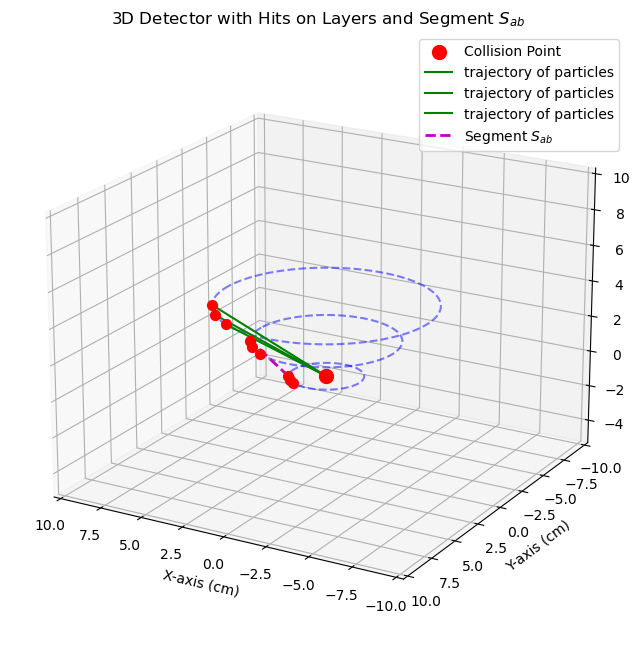

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot the detector layers, collision point, and particle trajectories in 3D
def plot_3d_detector_and_segments_with_layer_hits():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Parameters for the detector layout
    n_layers = 3  # Number of layers
    layer_radii = [2, 4, 6]  # Radii of the layers (cylindrical shells)
    z_positions = [0, 2, 4]  # Different z-positions for each layer
    collision_point = [0, 0, 0]  # Origin where collision happens

    # Plot the layers as circular cross-sections in the XY-plane at different Z levels
    theta = np.linspace(0, 2 * np.pi, 100)
    for radius, z in zip(layer_radii, z_positions):
        x = radius * np.cos(theta)
        y = radius * np.sin(theta)
        ax.plot(x, y, z, color='b', linestyle='--', alpha=0.5)

    # Plot the collision point (origin)
    ax.scatter(*collision_point, color='r', s=100, label='Collision Point')

    # Define some example particle trajectories in 3D
    angles = [np.pi / 6, np.pi / 4, np.pi / 3]  # Different angles in the XY-plane
    trajectories = []

    # Generate hits directly on the layers for each trajectory
    hits = []
    for angle in angles:
        traj = []
        for radius, z in zip(layer_radii, z_positions):
            x = radius * np.cos(angle)
            y = radius * np.sin(angle)
            traj.append([x, y, z])  # Hit position on the cylindrical shell (layer)
        trajectories.append(traj)

    # Plot the hits and particle trajectories in 3D
    for traj in trajectories:
        # Plot the trajectory as a green line (from the collision point to the last layer hit)
        ax.plot([collision_point[0], traj[-1][0]], 
                [collision_point[1], traj[-1][1]], 
                [collision_point[2], traj[-1][2]], color='g', label='trajectory of particles')

        # Plot each hit along the trajectory as a red point
        for hit in traj:
            ax.scatter(hit[0], hit[1], hit[2], color='r', s=50)

    # Plot an example oriented segment S_ab between two hits on different layers
    ax.plot([trajectories[0][0][0], trajectories[0][1][0]],  # x-coordinates
            [trajectories[0][0][1], trajectories[0][1][1]],  # y-coordinates
            [trajectories[0][0][2], trajectories[0][1][2]],  # z-coordinates
            color='m', linestyle='--', linewidth=2, label=r'Segment $S_{ab}$')

    # Add labels and adjust plot
    ax.set_xlabel('X-axis (cm)')
    ax.set_ylabel('Y-axis (cm)')
    ax.set_zlabel('Z-axis (cm)')
    ax.set_title('3D Detector with Hits on Layers and Segment $S_{ab}$')

    # Set plot limits and view angle
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])
    ax.set_zlim([-5, 10])
    ax.view_init(elev=20, azim=120)

    # Add legend
    ax.legend(loc='upper right')
    
    # Show plot
    plt.show()

# Call the function to plot the 3D detector, collision point, hits, and segments
plot_3d_detector_and_segments_with_layer_hits()


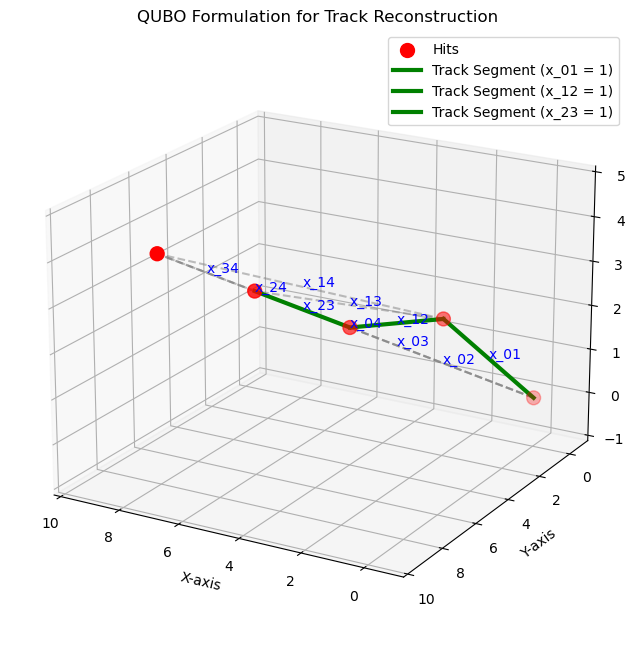

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Function to plot hits and segments for a QUBO formulation of the track problem
def plot_qubo_track_formulation():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Example hits positions (you can modify these as needed)
    hits = np.array([
        [0, 0, 0],     # Hit 0 (collision point)
        [2, 2, 2],     # Hit 1
        [4, 4, 2],     # Hit 2
        [6, 6, 3],     # Hit 3
        [8, 8, 4],     # Hit 4
    ])

    # Plot hits as red points
    ax.scatter(hits[:, 0], hits[:, 1], hits[:, 2], color='r', s=100, label="Hits")

    # Generate all possible segments between hits (combinations)
    segments = list(combinations(range(len(hits)), 2))  # All possible pairs of hits

    # Plot all possible segments (binary variables in QUBO)
    for (i, j) in segments:
        ax.plot([hits[i, 0], hits[j, 0]], [hits[i, 1], hits[j, 1]], [hits[i, 2], hits[j, 2]],
                color='gray', linestyle='--', alpha=0.5)
        # Label each segment with binary variable notation
        ax.text((hits[i, 0] + hits[j, 0]) / 2, (hits[i, 1] + hits[j, 1]) / 2,
                (hits[i, 2] + hits[j, 2]) / 2, f"x_{i}{j}", color='blue')

    # Highlight an example of a valid track (where the binary variables would be set to 1)
    ax.plot([hits[0, 0], hits[1, 0]], [hits[0, 1], hits[1, 1]], [hits[0, 2], hits[1, 2]],
            color='green', linewidth=3, label="Track Segment (x_01 = 1)")
    ax.plot([hits[1, 0], hits[2, 0]], [hits[1, 1], hits[2, 1]], [hits[1, 2], hits[2, 2]],
            color='green', linewidth=3, label="Track Segment (x_12 = 1)")
    ax.plot([hits[2, 0], hits[3, 0]], [hits[2, 1], hits[3, 1]], [hits[2, 2], hits[3, 2]],
            color='green', linewidth=3, label="Track Segment (x_23 = 1)")

    # Add labels and adjust plot
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.set_title('QUBO Formulation for Track Reconstruction')

    # Set plot limits and view angle
    ax.set_xlim([-1, 10])
    ax.set_ylim([-1, 10])
    ax.set_zlim([-1, 5])
    ax.view_init(elev=20, azim=120)

    # Add legend
    ax.legend(loc='upper right')

    # Show plot
    plt.show()

# Call the function to plot the QUBO track formulation
plot_qubo_track_formulation()


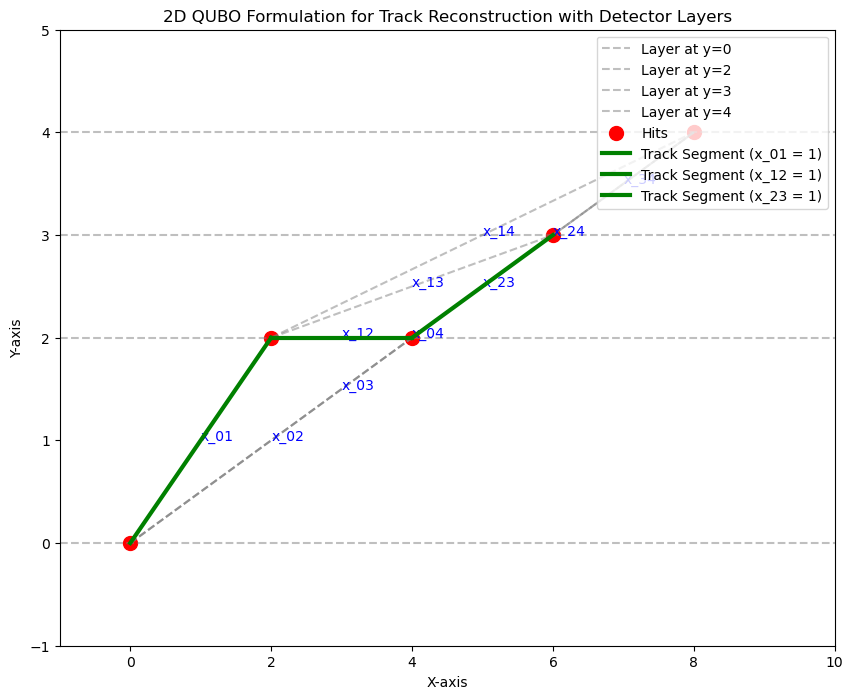

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# Function to plot hits, segments, and layers for a 2D QUBO formulation of the track problem
def plot_qubo_track_formulation_with_layers_and_straight_trajectories():
    fig, ax = plt.subplots(figsize=(10, 8))

    # Example hits positions (you can modify these as needed)
    hits = np.array([
        [0, 0],     # Hit 0 (collision point)
        [2, 2],     # Hit 1
        [4, 2],     # Hit 2
        [6, 3],     # Hit 3
        [8, 4],     # Hit 4
    ])

    # Define the layers (y positions where detector layers are placed)
    layers = [0, 2, 3, 4]  # Example Y-values representing layers

    # Plot the detector layers as horizontal lines
    for layer in layers:
        ax.axhline(y=layer, color='gray', linestyle='--', alpha=0.5, label=f'Layer at y={layer}')

    # Plot hits as red points
    ax.scatter(hits[:, 0], hits[:, 1], color='r', s=100, label="Hits")

    # Generate all possible segments between hits (combinations)
    segments = list(combinations(range(len(hits)), 2))  # All possible pairs of hits

    # Plot all possible segments (binary variables in QUBO)
    for (i, j) in segments:
        ax.plot([hits[i, 0], hits[j, 0]], [hits[i, 1], hits[j, 1]],
                color='gray', linestyle='--', alpha=0.5)
        # Label each segment with binary variable notation
        ax.text((hits[i, 0] + hits[j, 0]) / 2, (hits[i, 1] + hits[j, 1]) / 2, f"x_{i}{j}", color='blue')

    # Highlight an example of a valid track (where the binary variables would be set to 1)
    # These segments are straight lines connecting hits
    ax.plot([hits[0, 0], hits[1, 0]], [hits[0, 1], hits[1, 1]],
            color='green', linewidth=3, label="Track Segment (x_01 = 1)", zorder=5)
    ax.plot([hits[1, 0], hits[2, 0]], [hits[1, 1], hits[2, 1]],
            color='green', linewidth=3, label="Track Segment (x_12 = 1)", zorder=5)
    ax.plot([hits[2, 0], hits[3, 0]], [hits[2, 1], hits[3, 1]],
            color='green', linewidth=3, label="Track Segment (x_23 = 1)", zorder=5)

    # Add labels and adjust plot
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('2D QUBO Formulation for Track Reconstruction with Detector Layers')

    # Set plot limits
    ax.set_xlim([-1, 10])
    ax.set_ylim([-1, 5])

    # Add legend
    ax.legend(loc='upper right')

    # Show plot
    plt.show()

# Call the function to plot the 2D QUBO track formulation with straight trajectories
plot_qubo_track_formulation_with_layers_and_straight_trajectories()
